In [1]:
import modele as mod
import sections as s
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
import plotly.express as px
import xarray as xr


## Caractéristiques de la route

In [7]:
N = 100                        #Taille de la route (en mailles)   
U_init = np.zeros(N)           #Discrétisation de la route
#U_init[0:30] = 100
h = 0.1                         #Taille de chaque maille (en km)
I = 1                          #Nombre de lignes
nom = "Section solo test"

## Caractéristiques de la simulation

In [9]:
p_c = 100.                     #Densité critique (en vh/km)
p_max = 150.                   #Densité max (en vh/km)
V_0 = 50.                      #Vitesse souhaitée (en km/h)                         
flux_entrant = 800            #Flux de véhicules entrant (en vh/h)
fl_fix = flux_entrant
#flux_t_entrant = 0            #Flux de temps d'attente
#T = 1.4/3600                   #Temps de réaction
dt =  0.99*(h/V_0)             #CFL

In [358]:
def plus(route):  
    route.flux_entrant+=500


def moins(route):
    if route.flux_entrant - 500>=0:
        route.flux_entrant-=500

## Définitions des objets et def

In [407]:
#Définition de la route
route = s.section(p_max = p_max, V_0 = V_0, I = I, U = U_init, flux_entrant=flux_entrant, p_c = p_c, nom = nom, sortie=True)

init
I = 1
p_max = 150.0
T = 6.666666666666667e-05
2.0
La route Section solo test a p_c = 75.0


In [408]:
#Définition du modèle
model = mod.model([route], intersections= None, carrefours= None, dt = dt, h = h)

In [2]:
#Variation du flux d'entrée
def variation(route, fl_fix):
    sigma = np.random.normal(0,0.1)
    if int(route.flux_entrant + sigma*fl_fix)>0:
        route.flux_entrant = route.flux_entrant + sigma*fl_fix

    

# La suite à ne pas executer si on veut lancer MONTE CARLO !!!!

## Visualisation

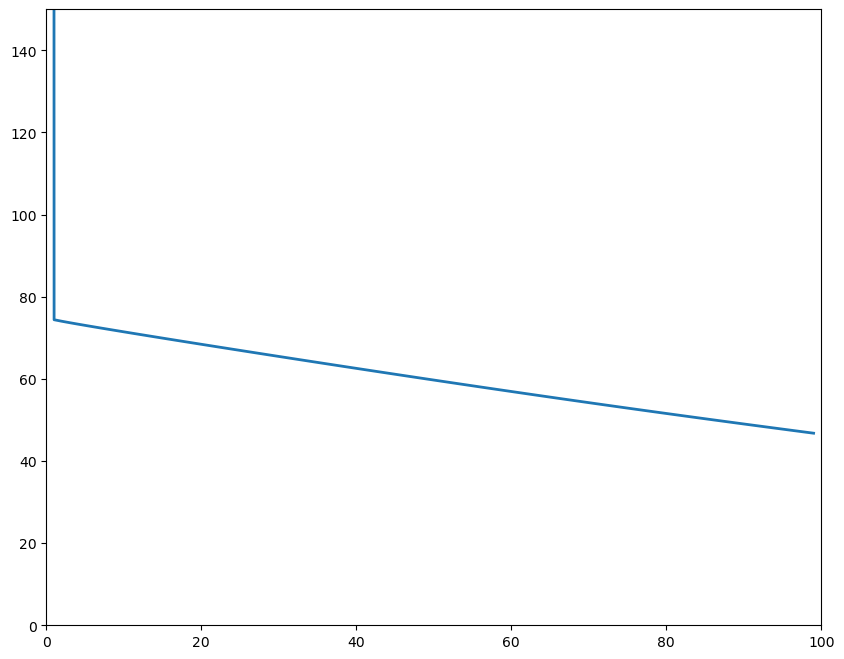

In [341]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(xlim=(0, N), ylim=(0, 150))
line, = plt.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    model.resoudre()
    variation(route)
    x = np.linspace(0, N-1, N)
    y = route.U
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(fig, animate, init_func=init, frames=500, interval=50, blit=True)

anim.save('densite_evolution.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

## Monte Carlo

In [3]:
def init_route():

    N = 100                        #Taille de la route (en mailles)   
    U_init = np.zeros(N)           #Discrétisation de la route
    #U_init[0:30] = 100
    h = 0.1                         #Taille de chaque maille (en km)
    I = 1                          #Nombre de lignes
    nom = "Section solo test"
    p_c = 100.                     #Densité critique (en vh/km)
    p_max = 150.                   #Densité max (en vh/km)
    V_0 = 50.                      #Vitesse souhaitée (en km/h)                         
    flux_entrant = 800            #Flux de véhicules entrant (en vh/h)
    fl_fix = flux_entrant
    #flux_t_entrant = 0            #Flux de temps d'attente
    #T = 1.4/3600                   #Temps de réaction
    dt =  0.99*(h/V_0)             #CFL

    route = s.section(p_max = p_max, V_0 = V_0, I = I, U = U_init, flux_entrant=flux_entrant, p_c = p_c, nom = nom, sortie=True)
    model = mod.model([route], intersections= None, carrefours= None, dt = dt, h = h)

    return route, model

In [4]:
def simulation(T):
    # T correspond au nombre de pas de temps qu'on veut pour notre simulation
    pho_global = np.zeros((T,N))
    route, model = init_route()

    for i in range(T):
        model.resoudre()
        variation(route, fl_fix)
        pho_global[i] = route.U

    return np.asarray(pho_global)

In [5]:
def MC_sim(M, simulator, T, N):
    # M correspond au nombre d'iter pour MC
    # simulator correspond au modèle à simuler
    stockage = []
    for m in range(M):
        sim = simulator(T)
        stockage.append(sim)
    return stockage

In [10]:
mc_values = MC_sim(100, simulation, 100, N)

init
I = 1
p_max = 150.0
T = 6.666666666666667e-05
2.0
La route Section solo test a p_c = 75.0
init
I = 1
p_max = 150.0
T = 6.666666666666667e-05
2.0
La route Section solo test a p_c = 75.0
init
I = 1
p_max = 150.0
T = 6.666666666666667e-05
2.0
La route Section solo test a p_c = 75.0
init
I = 1
p_max = 150.0
T = 6.666666666666667e-05
2.0
La route Section solo test a p_c = 75.0
init
I = 1
p_max = 150.0
T = 6.666666666666667e-05
2.0
La route Section solo test a p_c = 75.0
init
I = 1
p_max = 150.0
T = 6.666666666666667e-05
2.0
La route Section solo test a p_c = 75.0
init
I = 1
p_max = 150.0
T = 6.666666666666667e-05
2.0
La route Section solo test a p_c = 75.0
init
I = 1
p_max = 150.0
T = 6.666666666666667e-05
2.0
La route Section solo test a p_c = 75.0
init
I = 1
p_max = 150.0
T = 6.666666666666667e-05
2.0
La route Section solo test a p_c = 75.0
init
I = 1
p_max = 150.0
T = 6.666666666666667e-05
2.0
La route Section solo test a p_c = 75.0
init
I = 1
p_max = 150.0
T = 6.666666666666667e-05

In [11]:
np.shape(mc_values)

(100, 100, 100)

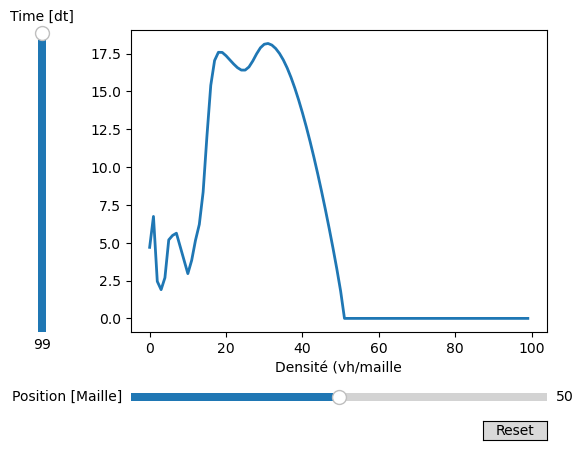

In [33]:
from matplotlib.widgets import Slider, Button

def density_dist(mc_v, x,t):
    return mc_v[:][x][t]

init_t = 99
init_x = 50


fig, ax = plt.subplots()
line, = ax.plot(density_dist(mc_values, init_t, init_x), lw=2)
ax.set_xlabel('Densité (vh/maille')

# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.25)

# Make a horizontal slider to control the frequency.
axfreq = fig.add_axes([0.25, 0.1, 0.65, 0.03])
freq_slider = Slider(
    ax=axfreq,
    label='Position [Maille]',
    valmin=0,
    valmax=100,
    valinit=init_x,
)

# Make a vertically oriented slider to control the amplitude
axamp = fig.add_axes([0.1, 0.25, 0.0225, 0.63])
amp_slider = Slider(
    ax=axamp,
    label="Time [dt]",
    valmin=0,
    valmax=100,
    valinit=init_t,
    orientation="vertical"
)


# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(density_dist(amp_slider.val, freq_slider.val))
    fig.canvas.draw_idle()


# register the update function with each slider
freq_slider.on_changed(update)
amp_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    freq_slider.reset()
    amp_slider.reset()
button.on_clicked(reset)

plt.show()

In [34]:
density_dist(mc_values, init_x, init_t)

array([17.30566064, 15.7993697 , 15.83737758, 16.35407622, 16.99725724,
       17.59359826, 17.46965457, 17.11086489, 16.80010844, 16.12849247,
       15.17715248, 14.2687075 , 13.55887721, 13.0970161 , 12.8380835 ,
       12.75314526, 12.91078066, 13.1599592 , 13.33808544, 13.48256832,
       13.67140674, 13.84713909, 13.90207383, 13.83505253, 13.75573498,
       13.79708076, 14.03464934, 14.46157528, 15.02969959, 15.69830575,
       16.45928084, 17.41082158, 18.84556238, 21.12893531, 24.15845401,
       27.0557333 , 29.00217487, 29.95170526, 30.28149908, 30.34273734,
       30.3524909 , 30.42700619, 30.61712404, 30.92302637, 31.30136538,
       31.67991956, 31.98298947, 32.15623884, 32.17772987, 32.0533327 ,
       31.80471674, 31.45831652, 31.03868205, 30.56579163, 30.05472262,
       29.51634569, 28.95828082, 28.38577982, 27.80243084, 27.21068141,
       26.61221105, 26.00818961, 25.3994529 , 24.78661989, 24.17016919,
       23.55048755, 22.92789922, 22.3026824 , 21.67507736, 21.04

In [22]:
np.asarray(mc_values).tofile('mc.csv', sep =",")